<a href="https://colab.research.google.com/github/Hyperspectral01/MNIST/blob/main/MNIST_Digit_Classification_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies or the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2                                        #stands for computer vision
from google.colab.patches import cv2_imshow       #actually colab doesn't allow imshow from cv2,thats why from colab.patches
from PIL import Image                             #stands for python imaging library
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras                      #tensorflow is developed by google && pytorch is developed by facebook
#tensorflow is used to create neural networks

from keras.datasets import mnist                  #keras can searched on net and find it has a few datasets of its own
from tensorflow.math import confusion_matrix


Now loading the MNIST data from keras.datasets , basically we'll be using mnist dataset of keras

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data() #splitting the data,load_data() is an inbuilt function in the library

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
#shape of the numpy arrays
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)  #By default grayscale images

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data=60000 images && Test Data=10000 images and each image has a dimension of 28X28,and these are grayscale images with values from 0 to 255 signifying the brightness of the white colour pixel.

In [ ]:
#printing the 10th image from x_train
print(x_train[9])     #x_train->> [[img],[img],[img],[img]...[img]] 60,000 images
                      #    img->> [[],[],[],[]...[]]  28X28 matrix

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 189 190   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 143 247 153   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 136 247 242  86   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 192 252 187   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  62 185  18   

In [ ]:
#shape of an image
print(x_train[9].shape)

(28, 28)


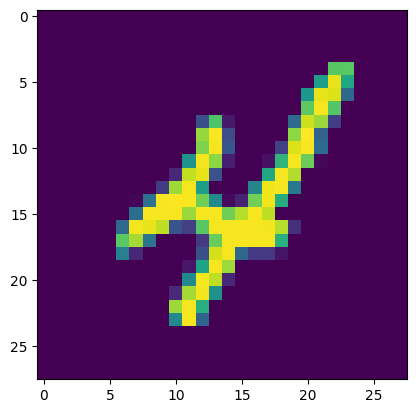

The label or the y_train data is  4


In [ ]:
#now converting these arrays of numbers into actual images
plt.imshow(x_train[9])
plt.show()

#Also corresponding y values
print("The label or the y_train data is ",y_train[9])

Image labels

In [ ]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [ ]:
#unique values in y_train (just to see how many numbers are being assessed)
print(np.unique(y_train))
print(np.unique(y_test))

#We can use these labels as they are or apply One Hot encoding on these

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Also all the images have the same dimensions in this dataset,otherwise we would have to resize the arrays or dimensions first then proceed

In [ ]:
x_train=x_train/255
x_test=x_test/255
#All the values have been converted in range 0 to 255,just basic normalisation

In [ ]:
#print the numbers of the 10th image
print(x_train[9])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building a normal Neural Network , it's not CNN (its complex but its better for image processing) , and its not even RNN (which is used for text and speech processing).

In [ ]:
#Setting up the layers of the neural network
#We have to setup the layers within the keras.Seqeuntial
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),       #(28,28,3)) for rgb values
    keras.layers.Dense(50,activation='relu'),        #relu is 'Rectified Linear Unit',it is one of the common acitvation functions that are used relu,sigmoid,liker and so on
    keras.layers.Dense(50, activation='relu'),        #50 neurons ANY NUMBER OF NEURONS CAN BE USED
    keras.layers.Dense(10,activation='sigmoid')       #10 neurons   BECAUSE 10 VALUES ARE BEING CLASSIFIED SO THIS IS NECESSARY
])

In [ ]:
#Now compiling the neural network

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Training the neural network
model.fit(x_train,y_train,epochs=10)      #10 epochs meaning the entire dataset will go through the neurons that we set up with the activations functions and optimisers and losses
                                          #basically 10 times dataset goes through the neural network


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2921 - accuracy: 0.9162
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1323 - accuracy: 0.9596
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0993 - accuracy: 0.9694
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0813 - accuracy: 0.9753
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0667 - accuracy: 0.9793
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0600 - accuracy: 0.9813
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0497 - accuracy: 0.9844
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0442 - accuracy: 0.9862
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0401 - accuracy: 0.9868
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.034

Training data accuracy is 98.83%

Now checking accuracy on test data to check for overfitting(meaning train data accuracy is 98% but test data accuracy is 60% or something)

**Accuracy on Test Data**

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)
print('Accuracy is ',accuracy)
print('Loss is ',loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.1190 - accuracy: 0.9686
Accuracy is  0.9685999751091003
Loss is  0.1189669668674469


**Test Data Accuracy is 96.85%**

In [ ]:
print(x_test.shape)

(10000, 28, 28)


The y_test value is  7


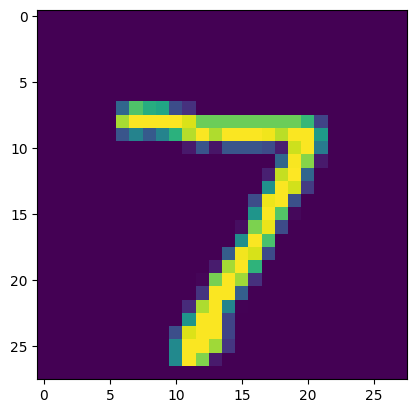

In [ ]:
plt.imshow(x_test[0])
print("The y_test value is ",y_test[0])

**Seeing how the predicted results look like**



In [ ]:
y_predicted=model.predict(x_test)
print(y_predicted.shape)

313/313 [==============================] - 1s 2ms/step
(10000, 10)


Now what is this 10????

In [ ]:
print(y_predicted[0])

[1.5065942e-05 7.7878765e-05 1.1314888e-01 9.9829370e-01 4.8256236e-08
 3.3393029e-02 3.2921892e-12 9.9999911e-01 6.0092155e-03 1.5364375e-02]


model.evaluate() gives the accuracy and stuff but
model.predict() gives the probability for all the classes in the end neurons
which is classes 0 to 9,i.e. 10 classes

In [ ]:
#converting probabilities to class labels
label_for_first_test_image=np.argmax(y_predicted[0])
print(label_for_first_test_image)                     #Basically 7 tells us that 7th index has the highest probability

7


In [ ]:
#converting the prediction probability to class labels for all x_test values
y_all_predicted=[np.argmax(i) for i in y_predicted]
print(y_all_predicted)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 4, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 0, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 5, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 



*   **y_test** -->> True Labels
*   **y_predicted** -->> Probabilities array
*   **y_all_predicted** -->> Predicted Labels (after applying np.argmax())



In [ ]:
conf_mat=confusion_matrix(y_test,y_all_predicted) #True values and predicted values
print(conf_mat)

tf.Tensor(
[[ 952    1    4    1    2    7    9    1    3    0]
 [   0 1123    2    0    0    1    1    1    7    0]
 [   0    2 1006    8    3    2    2    5    4    0]
 [   0    1    2  971    0   29    0    5    2    0]
 [   1    0    0    1  964    0    6    0    2    8]
 [   1    0    0    6    1  878    3    1    0    2]
 [   4    2    0    0    4   13  934    0    1    0]
 [   0    4   16    5    0    0    0  997    3    3]
 [   3    1    3    6    6   21    1    3  928    2]
 [   1    3    0    7   32   14    1   14    4  933]], shape=(10, 10), dtype=int32)


Building a heat map for the confusion matrix

Text(0.5, 47.7222222222222, 'Predicted values')

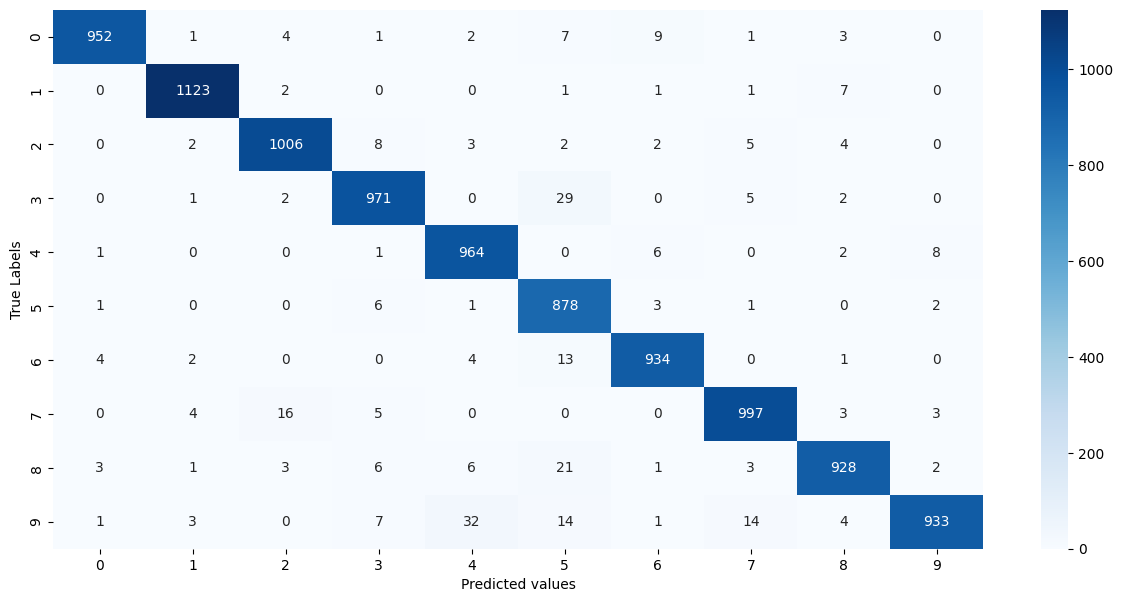

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted values')

**Building a predictive system**

In [ ]:
input_image_path='/content/sample_data/imresizer-1721476015691.jpg'
input_image=cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

[[[1 1 1]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[2 2 2]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[3 3 3]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


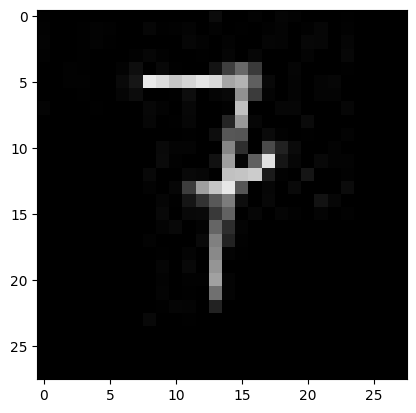

In [ ]:
plt.imshow(input_image)
plt.show()

In [ ]:
print(input_image.shape)

(28, 28, 3)


Since it is a 3,means it is a rgb image

In [ ]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
print(grayscale.shape)

(28, 28)


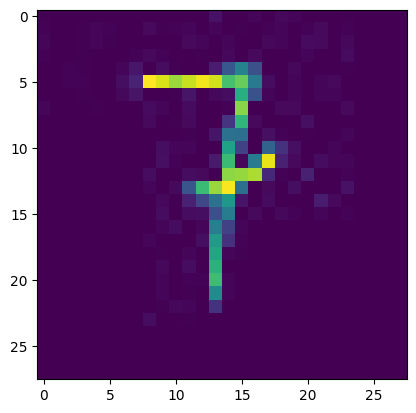

In [ ]:
plt.imshow(grayscale)
plt.show()

In [ ]:
print(grayscale)

[[  1   0   0   0   0   0   0   0   0   0   0   0   0  11   0   0   3   0
    5   3   0   0   0   1   0   0   0   0]
 [  2   0   0   1   3   2   0   0   6   1   2   4   0   3   0   1   0   2
    4   0   2   6   0   2   0   0   0   0]
 [  3   0   0   1   3   1   0   0   0   0   0   6   3   0   3   0   0   5
    4   0   7   6   0   5   0   0   0   0]
 [  2   0   0   1   0   0   0   2   6   2   0   0   1   0   5   0   6   0
    0   0   4   0   0   7   0   0   0   0]
 [  0   0   2   1   0   0   3  14   0   8   1   0   0  19  63 104  58   0
    0   5   0   0   0   1   0   0   0   0]
 [  0   0   2   2   0   0   9  22 233 220 198 213 228 217 165 179  95   8
    0   4   0   4   6   0   0   0   0   0]
 [  0   0   0   1   0   0   5  12   0   0   1  13   0   5   8 146  59   4
    0   4   0   4   4   0   0   0   0   0]
 [  4   0   0   0   1   0   0   0   7   3   0   7   0   0   2 192   0   0
    6   6   0   0   0   6   0   0   0   0]
 [  0   0   0   0   0   0   0   0   6   0   1   6   0   0  36 15

In [ ]:
cv2_imshow(grayscale)  #Another way to display the images

Can use cv2.resize(grayscale,(28,28)) for resizing

In [ ]:
grayscale=grayscale/255
print(grayscale)

[[0.00392157 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.04313725 0.         0.         0.01176471 0.
  0.01960784 0.01176471 0.         0.         0.         0.00392157
  0.         0.         0.         0.        ]
 [0.00784314 0.         0.         0.00392157 0.01176471 0.00784314
  0.         0.         0.02352941 0.00392157 0.00784314 0.01568627
  0.         0.01176471 0.         0.00392157 0.         0.00784314
  0.01568627 0.         0.00784314 0.02352941 0.         0.00784314
  0.         0.         0.         0.        ]
 [0.01176471 0.         0.         0.00392157 0.01176471 0.00392157
  0.         0.         0.         0.         0.         0.02352941
  0.01176471 0.         0.01176471 0.         0.         0.01960784
  0.01568627 0.         0.02745098 0.02352941 0.         0.01960784
  0.         0.         0.         0.        ]
 [0.00784314 0.         0.         0.00392157 0.         0.
  0.   

In [ ]:
print(grayscale.shape)

(28, 28)


In [ ]:
extra_reshape=np.reshape(grayscale,[1,28,28])

In [ ]:
custom_pred=model.predict(extra_reshape)
print(custom_pred)

1/1 [==============================] - 0s 30ms/step
[[1.10736182e-02 3.36326689e-01 1.76759765e-01 9.80202496e-01
  3.04738104e-01 1.21425316e-01 4.12648224e-04 5.81826687e-01
  4.68141764e-01 6.44102693e-01]]


Applying the np.argmax() to get the label with highest probability

In [ ]:
print(np.argmax(custom_pred[0]))

3


**-------------------------FINAL PREDICTIVE SYSTEM--------------------------------**

**MODEL BUILD AND TRAINING AND SAMPLE TESTING**

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2967 - accuracy: 0.9141
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1407 - accuracy: 0.9586
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1049 - accuracy: 0.9675
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0847 - accuracy: 0.9742
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0708 - accuracy: 0.9785
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0612 - accuracy: 0.9808
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0526 - accuracy: 0.9825
Epoch 8/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0465 - accuracy: 0.9852
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0415 - accuracy: 0.9869
Epoch 10/25
1875/

Text(0.5, 47.7222222222222, 'Predicted values')

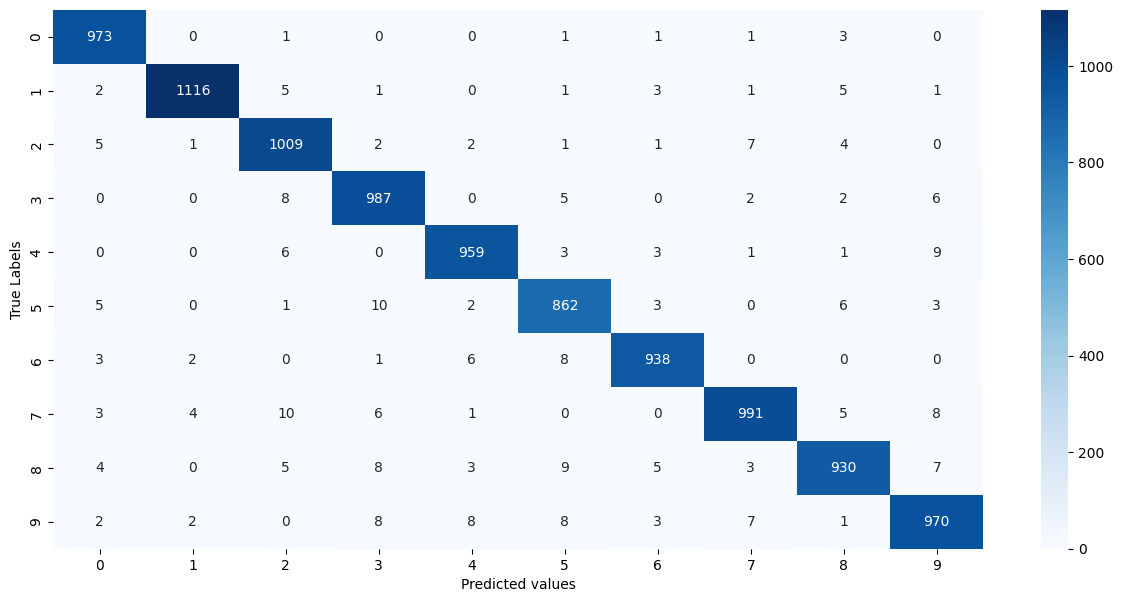

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2                                        #stands for computer vision
from google.colab.patches import cv2_imshow       #actually colab doesn't allow imshow from cv2,thats why from colab.patches
from PIL import Image                             #stands for python imaging library
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras                      #tensorflow is developed by google && pytorch is developed by facebook
#tensorflow is used to create neural networks

from keras.datasets import mnist                  #keras can searched on net and find it has a few datasets of its own
from tensorflow.math import confusion_matrix

(x_train,y_train),(x_test,y_test)=mnist.load_data() #splitting the data,load_data() is an inbuilt function in the library

x_train=x_train/255
x_test=x_test/255
#All the values have been converted in range 0 to 255,just basic normalisation

#Setting up the layers of the neural network
#We have to setup the layers within the keras.Seqeuntial
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),       #(28,28,3)) for rgb values
    keras.layers.Dense(50,activation='relu'),        #relu is 'Rectified Linear Unit',it is one of the common acitvation functions that are used relu,sigmoid,liker and so on
    keras.layers.Dense(50, activation='relu'),        #50 neurons ANY NUMBER OF NEURONS CAN BE USED
    keras.layers.Dense(10,activation='sigmoid')       #10 neurons   BECAUSE 10 VALUES ARE BEING CLASSIFIED SO THIS IS NECESSARY
])

#Now compiling the neural network

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#Training the neural network
model.fit(x_train,y_train,epochs=25)      #10 epochs meaning the entire dataset will go through the neurons that we set up with the activations functions and optimisers and losses
                                          #basically 10 times dataset goes through the neural network

loss,accuracy=model.evaluate(x_test,y_test)
print('Accuracy is ',accuracy)
print('Loss is ',loss)

y_predicted=model.predict(x_test)
#converting the prediction probability to class labels for all x_test values
y_all_predicted=[np.argmax(i) for i in y_predicted]

conf_mat=confusion_matrix(y_test,y_all_predicted) #True values and predicted values
print(conf_mat)

plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted values')

**INDIVIDUAL IMAGE TESTING**

Path of the image to be predicted: /content/sample_data/sample_image.webp


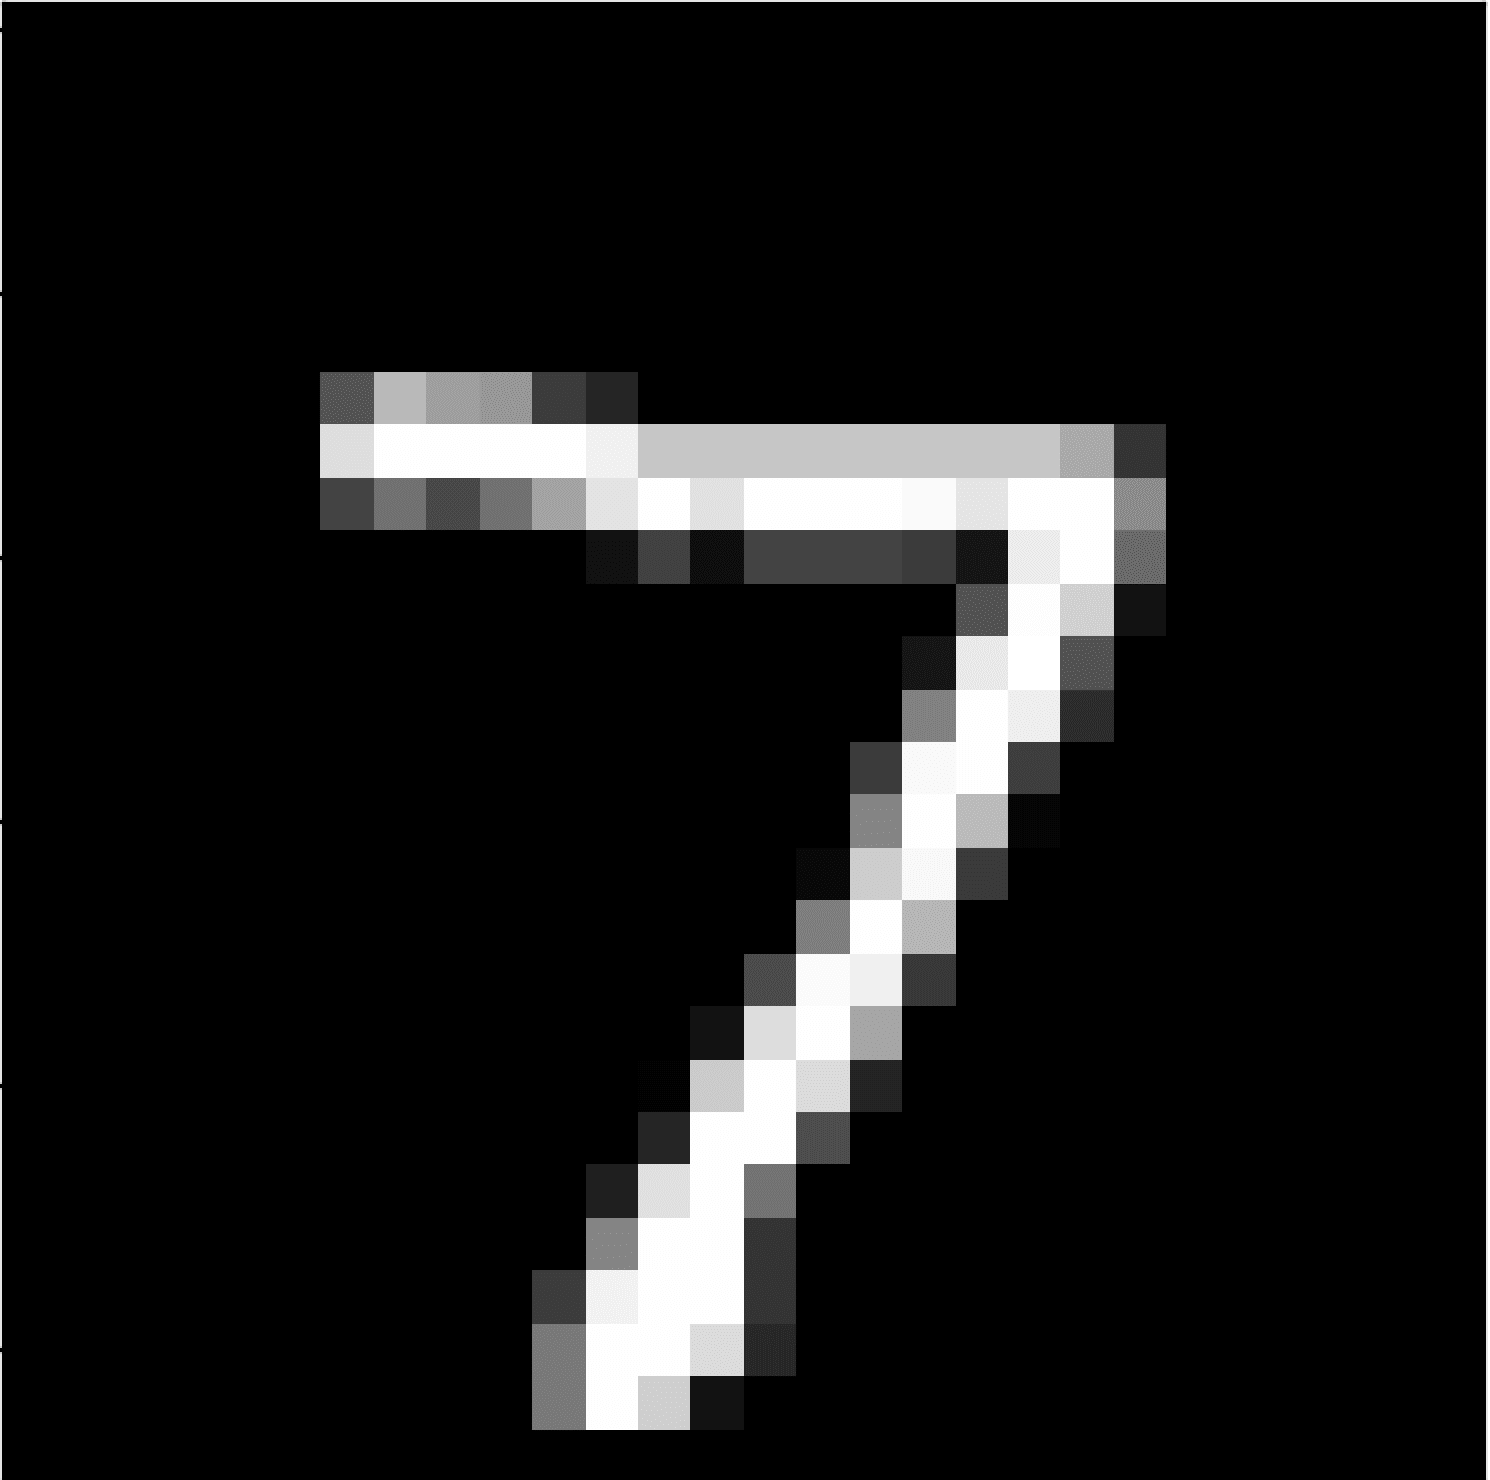

1/1 [==============================] - 0s 23ms/step
[[9.9445519e-04 2.9360305e-03 4.1048505e-04 4.9177328e-01 8.7121591e-13
  2.5063943e-07 3.3235142e-12 9.9999970e-01 3.9276852e-06 6.5963389e-03]]
The Handwritten Digit is recognised as  7


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

cv2_imshow(input_image_resize)

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)